In [73]:
import pandas as pd
df = pd.read_csv("/Users/sophiashull/Desktop/DS personal projects/Flight-Delay-Analysis-Project/Data/processed/cleaned_delay_data_1yr.csv")
df.head()

,Unnamed: 0,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,datetime
0,0,2025,1,G4,Allegiant Air,ELM,"Elmira/Corning, NY: Elmira/Corning Regional",30.0,0.0,0.00,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2025-01-01
1,1,2025,1,G4,Allegiant Air,ELP,"El Paso, TX: El Paso International",2.0,0.0,0.00,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2025-01-01
2,2,2025,1,G4,Allegiant Air,EUG,"Eugene, OR: Mahlon Sweet Field",28.0,8.0,3.74,...,2.66,2.0,0.0,409.0,236.0,0.0,70.0,0.0,103.0,2025-01-01
3,3,2025,1,G4,Allegiant Air,EVV,"Evansville, IN: Evansville Regional",18.0,1.0,0.00,...,0.00,0.0,0.0,1075.0,0.0,1075.0,0.0,0.0,0.0,2025-01-01
4,4,2025,1,G4,Allegiant Air,EWR,"Newark, NJ: Newark Liberty International",31.0,5.0,2.17,...,0.00,1.0,0.0,446.0,336.0,0.0,110.0,0.0,0.0,2025-01-01


In [108]:
# target 
df = df[df["arr_flights"]!=0]
df["delay_probability"] = df["arr_del15"]/df["arr_flights"]
df.head()

,Unnamed: 0,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,...,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,datetime,delay_probability
0,0,2025,1,G4,Allegiant Air,ELM,"Elmira/Corning, NY: Elmira/Corning Regional",30.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2025-01-01,0.000000
1,1,2025,1,G4,Allegiant Air,ELP,"El Paso, TX: El Paso International",2.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2025-01-01,0.000000
2,2,2025,1,G4,Allegiant Air,EUG,"Eugene, OR: Mahlon Sweet Field",28.0,8.0,3.74,...,2.0,0.0,409.0,236.0,0.0,70.0,0.0,103.0,2025-01-01,0.285714
3,3,2025,1,G4,Allegiant Air,EVV,"Evansville, IN: Evansville Regional",18.0,1.0,0.00,...,0.0,0.0,1075.0,0.0,1075.0,0.0,0.0,0.0,2025-01-01,0.055556
4,4,2025,1,G4,Allegiant Air,EWR,"Newark, NJ: Newark Liberty International",31.0,5.0,2.17,...,1.0,0.0,446.0,336.0,0.0,110.0,0.0,0.0,2025-01-01,0.161290


In [100]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
# Features and Target 
X = df[["carrier_name", "airport", "month", "carrier_ct", "arr_del15", "arr_flights", "year"]]
y = df["delay_probability"]
X_encoded = pd.get_dummies(X, columns=["carrier_name", "airport"])
X_train, X_test, y_train, y_test = train_test_split(X_encoded,y,test_size=0.3,random_state=20)
training_df = pd.concat([X_train, y_train], axis=1)
testing_df = pd.concat([X_test, y_test], axis=1)

In [101]:
training_df.reset_index(drop=True, inplace=True)
testing_df.reset_index(drop=True, inplace=True)
testing_df.head()

,month,carrier_ct,arr_del15,arr_flights,year,carrier_name_Air Wisconsin Airlines Corp,carrier_name_Alaska Airlines Network,carrier_name_Allegiant Air,carrier_name_American Airlines Network,carrier_name_CommuteAir LLC dba CommuteAir,...,airport_VLD,airport_VPS,airport_WRG,airport_WYS,airport_XNA,airport_XWA,airport_YAK,airport_YKM,airport_YUM,delay_probability
0,10,41.12,71.0,483.0,2024,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,14.699793
1,2,4.30,8.0,145.0,2024,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,5.517241
2,9,4.02,7.0,60.0,2024,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,11.666667
3,1,2.88,9.0,31.0,2025,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,29.032258
4,4,50.81,103.0,510.0,2024,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,20.196078


In [102]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17156, 385)
(7353, 385)
(17156,)
(7353,)


In [103]:
# model 
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [104]:
predictions = model.predict(X_test)

In [99]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
#evaluation 
r2_val = r2_score(y_test, predictions)
mse_val = mean_squared_error(y_test, predictions)
mae_val = mean_absolute_error(y_test, predictions)
print(r2_val)
print(mse_val)
print(mae_val)


0.991406052852239
1.0345017057649566
0.33374704221440005


<Axes: xlabel='delay_probability'>

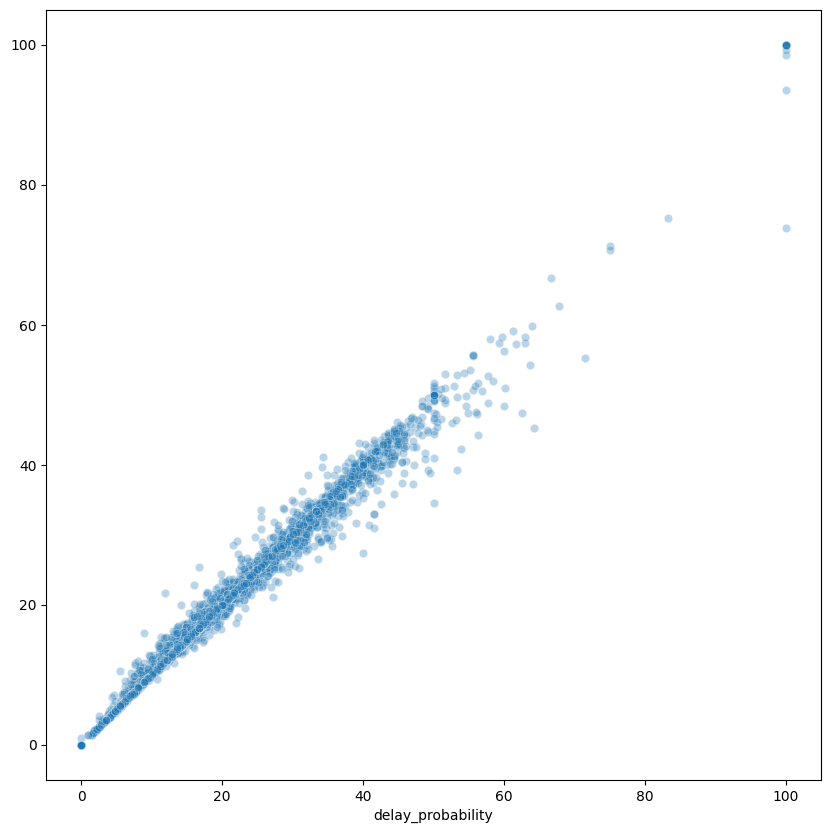

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
#Actual vs Predicted
plt.figure(figsize=(10,10))
plt.xlabel="Actual"
plt.ylabel="Predicted"
plt.title="Actual vs Predicted"
sns.scatterplot(x=y_test, y=predictions,alpha=0.3) 


In [107]:
import joblib
joblib.dump(model,"/Users/sophiashull/Desktop/DS personal projects/Flight-Delay-Analysis-Project/Data/processed/flight_delays_model")
model_columns = X_train.columns
joblib.dump(model_columns, "/Users/sophiashull/Desktop/DS personal projects/Flight-Delay-Analysis-Project/Data/processed/model_columns.pkl")


['/Users/sophiashull/Desktop/DS personal projects/Flight-Delay-Analysis-Project/Data/processed/model_columns.pkl']